In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def read_data(filepath):
    """
    Read the data from the specified CSV file, filter out lines with more than ten items,
    and return the data as a pandas DataFrame.
    
    Parameters:
    filepath (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: The DataFrame containing the data.
    """
    # List to store valid rows
    valid_rows = []

    # Read the file and filter rows
    with open(filepath, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) == 10: 
                valid_rows.append(row)

    # Define column names based on your dataset structure
    columns = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 
               'baseColour', 'season', 'year', 'usage', 'productDisplayName']

    # Create DataFrame
    df = pd.DataFrame(valid_rows[1:], columns=columns)  # Skip the header row

    return df

In [6]:
filepath = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv'
df_styles = read_data(filepath)

In [7]:
def initial_inspection(df):
    """
    Perform initial inspection of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.
    
    Returns:
    None
    """
    # Display first few rows and shape of the DataFrame
    print("First few rows of the dataset:")
    print(df.head())
    
    print("\nDataset shape:")
    print(df.shape)
    
    # Display data types and basic statistics
    print("\nData types and basic statistics:")
    print(df.info())
    print(df.describe())
    
    # Check for null values
    print("\nNull values:")
    print(df.isnull().sum())
    
    # Check for duplicates
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
    

In [8]:
initial_inspection(df_styles)

First few rows of the dataset:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  
1  2012  Casual             Peter England Men Party Blue Jeans  
2  2016  Casual                       Titan Women Silver Watch  
3  2011  Casual  Manchester United Men Solid Black Track Pants  
4  2012  Casual                          Puma Men Grey T-shirt  

Dataset shape:
(44424, 10)

Data types and basic statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [17]:
def explore_data(df):
    """
    Explore and visualize data from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to explore.

    Returns:
    None
    """
    # Print unique values for each column except 'id' and 'productDisplayName'
    for column in df.columns:
        if column not in ['id', 'productDisplayName']:
            unique_values = df[column].unique()
            print(f"Unique values in '{column}':")
            print(unique_values)
            print()
    
    # Analyze articleType for each gender
    genders = df['gender'].unique()
    for gender in genders:
        print(f"Most common articleType for '{gender}':")
        most_common_type = df[df['gender'] == gender]['articleType'].mode().values[0]
        print(most_common_type)
        print()
    
    # Analyze most repeated baseColour for each gender
    for gender in genders:
        print(f"Most repeated baseColour for '{gender}':")
        most_common_color = df[df['gender'] == gender]['baseColour'].mode().values[0]
        print(most_common_color)
        print()
    
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    df['baseColour'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Count of each baseColour')
    plt.xlabel('Base Colour')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(222)
    df['articleType'].value_counts().nlargest(10).plot(kind='bar', color='salmon')
    plt.title('Top 10 most common articleTypes')
    plt.xlabel('Article Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(223)
    df['season'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title('Count of each season')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(224)
    df['gender'].value_counts().plot(kind='bar', color='plum')
    plt.title('Count of each gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    
    plt.show()

Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']

Unique values in 'masterCategory':
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']

Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']

Unique values in 'articleType':
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 

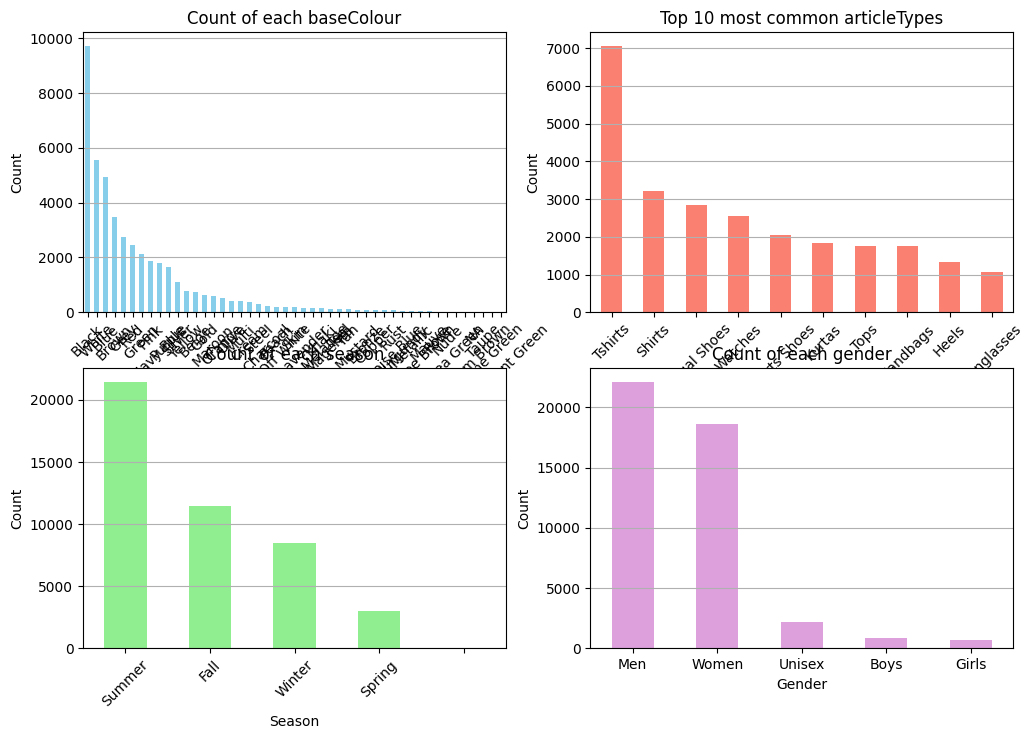

In [18]:
explore_data(df_styles)

**Everything is very unbalanced, which can create a biased model**

# Model

In [28]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.optim as optim
from sklearn.metrics import accuracy_score
import time
from torch.utils.data import DataLoader, Dataset, default_collate



In [30]:

class FashionDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['id']
        img_path = os.path.join(self.img_dir, f'{img_name}.jpg')
        
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            return None
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        labels = {
            'baseColour': self.df.iloc[idx]['baseColour'],
            'articleType': self.df.iloc[idx]['articleType'],
            'season': self.df.iloc[idx]['season'],
            'gender': self.df.iloc[idx]['gender']
        }
        
        return image, labels




# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Split data into train and validation sets
df_train, df_val = train_test_split(df_styles, test_size=0.2, random_state=42)

# Create train and validation datasets and dataloaders
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = FashionDataset(df_train, img_dir='/kaggle/input/fashion-product-images-dataset/fashion-dataset/images', transform=train_transform)
val_dataset = FashionDataset(df_val, img_dir='/kaggle/input/fashion-product-images-dataset/fashion-dataset/images', transform=train_transform)


def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return default_collate(batch)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2, collate_fn=collate_fn)



In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiTaskModel(nn.Module):
    def __init__(self, num_colors, num_types, num_seasons, num_genders):
        super(MultiTaskModel, self).__init__()
        self.shared_conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.fc_common = nn.Sequential(
            nn.Linear(64 * 32 * 32, 256),
            nn.ReLU()
        )
        
        self.fc_color = nn.Linear(256, num_colors)
        self.fc_type = nn.Linear(256, num_types)
        self.fc_season = nn.Linear(256, num_seasons)
        self.fc_gender = nn.Linear(256, num_genders)

    def forward(self, x):
        x = self.shared_conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc_common(x)
        
        color = self.fc_color(x)
        type_ = self.fc_type(x)
        season = self.fc_season(x)
        gender = self.fc_gender(x)
        
        return color, type_, season, gender


num_colors = len(df_styles['baseColour'].unique())
num_types = len(df_styles['articleType'].unique())
num_seasons = len(df_styles['season'].unique())
num_genders = len(df_styles['gender'].unique())

model = MultiTaskModel(num_colors, num_types, num_seasons, num_genders)


In [25]:
def validate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct_color = 0
    correct_type = 0
    correct_season = 0
    correct_gender = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels_color = torch.tensor([color_mapping[l] for l in labels['baseColour']]).to(device)
            labels_type = torch.tensor([type_mapping[l] for l in labels['articleType']]).to(device)
            labels_season = torch.tensor([season_mapping[l] for l in labels['season']]).to(device)
            labels_gender = torch.tensor([gender_mapping[l] for l in labels['gender']]).to(device)
            
            # Forward pass
            color_pred, type_pred, season_pred, gender_pred = model(images)
            
            # Compute loss
            loss_color = criterion(color_pred, labels_color)
            loss_type = criterion(type_pred, labels_type)
            loss_season = criterion(season_pred, labels_season)
            loss_gender = criterion(gender_pred, labels_gender)
            
            loss = loss_color + loss_type + loss_season + loss_gender
            running_loss += loss.item()
            
            # Compute accuracy
            _, predicted_color = torch.max(color_pred, 1)
            _, predicted_type = torch.max(type_pred, 1)
            _, predicted_season = torch.max(season_pred, 1)
            _, predicted_gender = torch.max(gender_pred, 1)
            
            correct_color += (predicted_color == labels_color).sum().item()
            correct_type += (predicted_type == labels_type).sum().item()
            correct_season += (predicted_season == labels_season).sum().item()
            correct_gender += (predicted_gender == labels_gender).sum().item()
            total_samples += labels_color.size(0)
            
    avg_loss = running_loss / len(dataloader)
    accuracy_color = correct_color / total_samples
    accuracy_type = correct_type / total_samples
    accuracy_season = correct_season / total_samples
    accuracy_gender = correct_gender / total_samples

    return avg_loss, accuracy_color, accuracy_type, accuracy_season, accuracy_gender


In [31]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, patience=3):
    model.to(device)
    model.train()
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        epoch_start_time = time.time()  # Start time of the epoch
        running_loss = 0.0
        correct_color = 0
        correct_type = 0
        correct_season = 0
        correct_gender = 0
        total_samples = 0

        print(f'Starting epoch {epoch+1}/{num_epochs}...')
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels_color = torch.tensor([color_mapping[l] for l in labels['baseColour']]).to(device)
            labels_type = torch.tensor([type_mapping[l] for l in labels['articleType']]).to(device)
            labels_season = torch.tensor([season_mapping[l] for l in labels['season']]).to(device)
            labels_gender = torch.tensor([gender_mapping[l] for l in labels['gender']]).to(device)
            
            optimizer.zero_grad()
            
            # Forward pass
            color_pred, type_pred, season_pred, gender_pred = model(images)
            
            # Compute loss
            loss_color = criterion(color_pred, labels_color)
            loss_type = criterion(type_pred, labels_type)
            loss_season = criterion(season_pred, labels_season)
            loss_gender = criterion(gender_pred, labels_gender)
            
            loss = loss_color + loss_type + loss_season + loss_gender
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Compute accuracy
            _, predicted_color = torch.max(color_pred, 1)
            _, predicted_type = torch.max(type_pred, 1)
            _, predicted_season = torch.max(season_pred, 1)
            _, predicted_gender = torch.max(gender_pred, 1)
            
            correct_color += (predicted_color == labels_color).sum().item()
            correct_type += (predicted_type == labels_type).sum().item()
            correct_season += (predicted_season == labels_season).sum().item()
            correct_gender += (predicted_gender == labels_gender).sum().item()
            total_samples += labels_color.size(0)
            
            if batch_idx % 10 == 0:  # Print every 10 batches
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item()}')
        
        epoch_end_time = time.time()  # End time of the epoch
        epoch_duration = epoch_end_time - epoch_start_time  # Duration of the epoch

        avg_loss = running_loss / len(train_loader)
        accuracy_color = correct_color / total_samples
        accuracy_type = correct_type / total_samples
        accuracy_season = correct_season / total_samples
        accuracy_gender = correct_gender / total_samples

        print(f'Epoch [{epoch+1}/{num_epochs}] completed in {epoch_duration:.2f} seconds, '
              f'Average Loss: {avg_loss:.4f}, Color Accuracy: {accuracy_color:.4f}, '
              f'Type Accuracy: {accuracy_type:.4f}, Season Accuracy: {accuracy_season:.4f}, '
              f'Gender Accuracy: {accuracy_gender:.4f}')

        # Validation step
        val_loss, val_accuracy_color, val_accuracy_type, val_accuracy_season, val_accuracy_gender = validate_model(model, val_loader, criterion)
        print(f'Validation Loss: {val_loss:.4f}, '
              f'Color Accuracy: {val_accuracy_color:.4f}, '
              f'Type Accuracy: {val_accuracy_type:.4f}, '
              f'Season Accuracy: {val_accuracy_season:.4f}, '
              f'Gender Accuracy: {val_accuracy_gender:.4f}')
        
        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break


In [32]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, patience=3)

Starting epoch 1/10...
Epoch [1/10], Batch [1/2222], Loss: 12.01923656463623
Epoch [1/10], Batch [11/2222], Loss: 10.078567504882812
Epoch [1/10], Batch [21/2222], Loss: 8.879051208496094
Epoch [1/10], Batch [31/2222], Loss: 9.438215255737305
Epoch [1/10], Batch [41/2222], Loss: 7.941922664642334
Epoch [1/10], Batch [51/2222], Loss: 9.232576370239258
Epoch [1/10], Batch [61/2222], Loss: 7.181757926940918
Epoch [1/10], Batch [71/2222], Loss: 8.148598670959473
Epoch [1/10], Batch [81/2222], Loss: 7.579327583312988
Epoch [1/10], Batch [91/2222], Loss: 8.426827430725098
Epoch [1/10], Batch [101/2222], Loss: 6.835294723510742
Epoch [1/10], Batch [111/2222], Loss: 6.268610954284668
Epoch [1/10], Batch [121/2222], Loss: 6.371725082397461
Epoch [1/10], Batch [131/2222], Loss: 8.391303062438965
Epoch [1/10], Batch [141/2222], Loss: 6.685508728027344
Epoch [1/10], Batch [151/2222], Loss: 6.698707580566406
Epoch [1/10], Batch [161/2222], Loss: 5.80660343170166
Epoch [1/10], Batch [171/2222], Loss

In [35]:
def predict(model, image_path, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    image = image.to(device)
    
    with torch.no_grad():
        color_pred, type_pred, season_pred, gender_pred = model(image)
        
    color = list(color_mapping.keys())[torch.argmax(color_pred).item()]
    type_ = list(type_mapping.keys())[torch.argmax(type_pred).item()]
    season = list(season_mapping.keys())[torch.argmax(season_pred).item()]
    gender = list(gender_mapping.keys())[torch.argmax(gender_pred).item()]
    
    return color, type_, season, gender


Processing image: /kaggle/input/testing/test_5.jpg


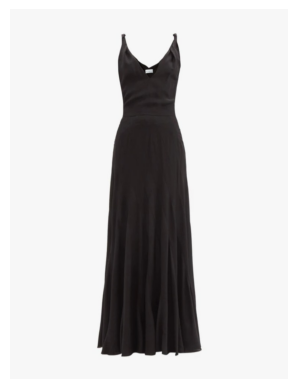

Color: Black, Type: Watches, Season: Winter, Gender: Women
Processing image: /kaggle/input/testing/test_7.jpg


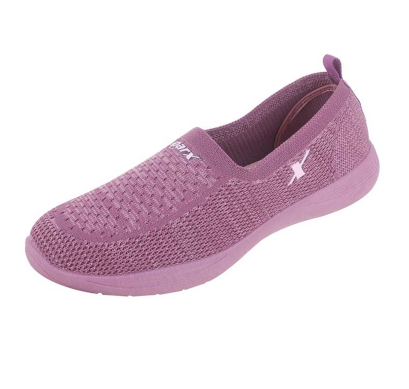

Color: Purple, Type: Sunglasses, Season: Winter, Gender: Women
Processing image: /kaggle/input/testing/test_4.jpg


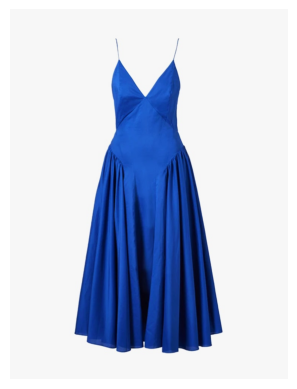

Color: Blue, Type: Socks, Season: Fall, Gender: Women
Processing image: /kaggle/input/testing/test_3.jpg


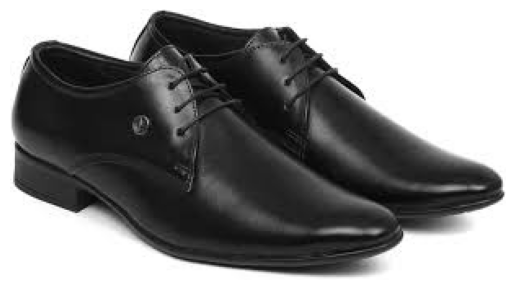

Color: Black, Type: Jackets, Season: Summer, Gender: Men
Processing image: /kaggle/input/testing/test_2.jpg


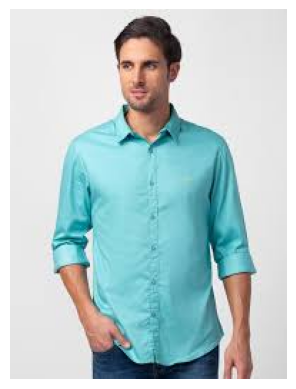

Color: Green, Type: Shirts, Season: Summer, Gender: Men
Processing image: /kaggle/input/testing/test_1.jpg


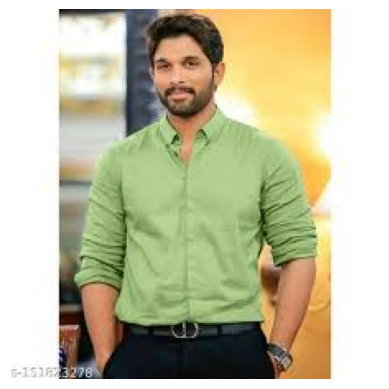

Color: Green, Type: Trunk, Season: Fall, Gender: Men
Processing image: /kaggle/input/testing/test_6.jpg


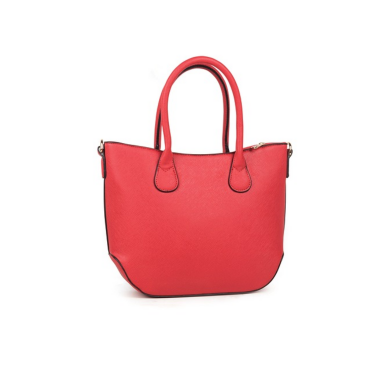

Color: Skin, Type: Face Moisturisers, Season: Spring, Gender: Women


In [39]:
import matplotlib.pyplot as plt

# List the images in the directory
image_dir = '/kaggle/input/testing/'
image_files = os.listdir(image_dir)
image_files = [os.path.join(image_dir, f) for f in image_files if f.endswith('.jpg')]

# Example transform (adjust according to your training transform)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Loop through each image file, display it, and make predictions
for image_file in image_files:
    print(f"Processing image: {image_file}")
    
    # Open and display the image
    image = Image.open(image_file)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Make predictions
    prediction = predict(model, image_file, transform)
    print(f'Color: {prediction[0]}, Type: {prediction[1]}, Season: {prediction[2]}, Gender: {prediction[3]}')
